# Introductory applied machine learning (INFR10069)
# Assignment 4: Unsupervised Learning Part A (KMeans Clustering)

<div align="right"><font color="blue" size="5">Your Score was 59.5 out of a total of 77.0, or 77.3%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 4 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 4 and deals with the News-Group Dataset - Part B deals with the MNIST dataset. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:
1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.
   
1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 04_A_KMeans.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_A_KMeans.ipynb
    scp -r [FULL PATH TO 04_B_PCA.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:04_B_PCA.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 04_A_KMeans.ipynb 04_B_PCA.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Both Part A (this notebook) and Part B are each worth 50% of the Total Mark for Assignment 4.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# For Getting the Data
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plotter
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

In this part of the assignment we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

### Description of the Data

This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)) for each word instead of the frequency counts (which is why we will be downloading it anew). These weights represent the importance of a word to a document with respect to a collection of documents. The importance increases proportionally to the number of times a word appears in the document and decreases proportionally to the number of times the word appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that appear in more than two documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words). We have provided the code for this preprocessing for you.

## 1. Exploration of the dataset

Instead of providing the data as a dataset, we are going to import the data from the sklearn library. Make sure you have an active internet connection and run the cell below to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.19/datasets/index.html#the-20-newsgroups-text-dataset)).

**Do not change any of the code in this cell.**

*This may take a wee while as it needs to download the dataset and preprocess it.*

In [2]:
# Load the Data with only the required categories
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'), data_home='./datasets')
# Transform Data to TF-IDF and store in X/y
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X = pd.DataFrame(vectorizer.fit_transform(newsgroups_train.data).todense(), 
                 columns=vectorizer.get_feature_names())
y = pd.Series(np.array(cats)[newsgroups_train.target])

### ========== Question 1.1 --- [10 marks] ==========

As usual we start with an initial inspection of the data. 

&nbsp;&nbsp;**(a)** [Code] Using suitable pandas/numpy methods, summarise the key properties of the data (variables `X` and `y`). This should be no more than a few lines of code.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on your observations from ***(a)*** (dimensionality, data ranges, anything out of the ordinary). Be sure to indicate what `X` and `y` are (data type and purpose). (<5 sentences)<br>
&nbsp;&nbsp;**(c)** [Text] Why do you think it is useful to consider TF-IDF weights as opposed to just the frequency of times a word appears in a document as a feature? (1 or 2 sentences)

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

In [3]:
print(type(X))
print('*' * 10)
print('The dimensions of the feature set are: ',X.shape)
print('*' * 10)
print('Printing 5 records from the feature set')
print('*' * 10)
print(X.head(5))
print('*' * 10)
print('Printing description of the feature set')
print('*' * 10)
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
**********
The dimensions of the feature set are:  (2845, 1000)
**********
Printing 5 records from the feature set
**********
   abc  ability  able   ac  accept  access  according  acquired  actually  \
0  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
1  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
2  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
3  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   
4  0.0      0.0   0.0  0.0     0.0     0.0        0.0       0.0       0.0   

   adaptec  ...   written  wrong  yankees  yeah  year  years  yes  york  \
0      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   
1      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   
2      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0   
3      0.0  ...       0.0    0.0      0.0   0.0   0.0    0.0  0.0   0.0  

In [4]:
print('Printing data types of the feature set')
print(X.dtypes)

Printing data types of the feature set
abc          float64
ability      float64
able         float64
ac           float64
accept       float64
access       float64
according    float64
acquired     float64
actually     float64
adaptec      float64
adapter      float64
add          float64
address      float64
advance      float64
advantage    float64
advice       float64
ago          float64
agree        float64
ahead        float64
ahl          float64
al           float64
allow        float64
allowed      float64
allows       float64
alomar       float64
alt          float64
american     float64
amour        float64
andrew       float64
angeles      float64
              ...   
wings        float64
winner       float64
winning      float64
winnipeg     float64
wins         float64
wish         float64
women        float64
won          float64
wonder       float64
wondering    float64
word         float64
words        float64
work         float64
working      float64
works        flo

In [5]:
print(type(y))
print('*' * 10)
print('The dimensions of the class label set are: ',y.shape)
print('*' * 10)
print('Printing 5 records from the class label set')
print('*' * 10)
print(y.head(5))
print('*' * 10)
print('Printing description of the class label set')
print('*' * 10)
print(y.describe())

<class 'pandas.core.series.Series'>
**********
The dimensions of the class label set are:  (2845,)
**********
Printing 5 records from the class label set
**********
0          rec.sport.baseball
1          rec.sport.baseball
2            rec.sport.hockey
3    comp.sys.ibm.pc.hardware
4          rec.sport.baseball
dtype: object
**********
Printing description of the class label set
**********
count                 2845
unique                   5
top       rec.sport.hockey
freq                   600
dtype: object


<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Did not plot class distribution.</font></div>

(b) X is a pandas data frame that contains the features of the data set. There are 1000 features (columns) in the data set and 2845 data points (rows). The data type of each cell in X is float64. Each row in X represents a document and each cell of X stores the tf-idf weight for, each word in each of the documents. On observing the output of X.describe(), in most cases, the max values were much higher than the mean values and the values in {min,25%,50% & 75%} were zero.

y is pandas series that contains the corresponding class labels for each document in X. It has 2845 rows. It has 5 unique values. The most common value in y is "rec.sport.hockey" and the frequency of the most common value is 600.

<div align="right"><font color="blue" size="4">4.0</font></div>

<div align="left"><font color="green" size="4">Did not comment on other attribute of the data: e.g. that the range is 0 to 1.0</font></div>

(c) In just counting the frequency of words in a document there is no real way of saying the importance of that word in the document, as it may be just a frequently appearing word in the English Language. 

TF-IDF is a product of the term frequency (f) and the inverse document frequency (idf). In tf-idf the importance of a word to the document increases proportionally to the number of times it occurs in the document and it decreases (scaled down) based on the number of the number of documents with the term in the entire corpus. Hence, using tf-idf we can measure the real importance of a certain word to a document.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

## 2. Unsupervised Learning

### ========== Question 2.1 --- [6 marks] ==========

We will now use [K-Means](http://scikit-learn.org/0.19/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering as a means of unsupervised learning of the document classes. Familiarise yourself with the implementation and then answer the following questions.

&nbsp;&nbsp;**(a)** [Text] The KMeans algorithm is non-deterministic. Explain what is meant by this, why this is the case, and how the final model is selected (3 sentences).<br>
&nbsp;&nbsp;**(b)** [Text] One of the parameters we need to specify when using k-means is the number of clusters. What is a reasonable number for this problem and why? *Hint: Look at the `y` values, which are in a Pandas `Series`*.<br>
&nbsp;&nbsp;**(b)** [Code] Create and fit a K-Means model to the training data `X` with your specified number of clusters. For reproducability, set `random_state=1000` -- keep other arguments at default values. Keep track of the k-means object created.

<div align="right"><font color="blue" size="4">5.0/6.0</font></div>

(a) 
- A non-deterministic algorithm is an algorithm that produces different outputs for different instances of execution of the same program (algorithm), despite providing the same inputs.

- K means is non-deterministic because the output and convergence time of the algorithm depends on how the initial set of centroids for the clusters, are chosen.

- Using the initial set of centroids as the seed for the clusters, the algorithm forms the clusters from the data set and computes the new centroids. It repeats the process of forming the cluster until the decrease in the objective function reaches a value within the tolerance limit. Once the algorithm attains this state, it outputs the clusters formed. This is how the model is selected.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Did not comment on method for model selection.</font></div>

(b) 5 is a resaonable value for the number of clusters because there are 5 classes in the dataset. This is deduced from the fact that pandas series (y) has 5 unique values. 

<div align="right"><font color="blue" size="4">2.0</font></div>

In [6]:
num_of_clusters = 5
random_state = 1000
kmeans = KMeans(n_clusters=num_of_clusters,random_state=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1000, tol=0.0001, verbose=0)

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

### ========== Question 2.2 --- [6 marks] ==========

<div align="right"><font color="blue" size="4">4.0/6.0</font></div>

We will now evaluate the quality of this fit, primarily through the Adjusted Rand Index (ARI) of the model.

&nbsp;&nbsp;**(a)** [Text] By referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what the ARI (`adjusted_rand_score`) measures about the quality of the fit. What is a disadvantage of this measure for evaluating clustering performance? (2-3 sentences) <br>
&nbsp;&nbsp;**(b)** [Code] Compute (and display) the Adjusted Rand Index of the fitted model.<br>
&nbsp;&nbsp;**(c)** [Text] Comment (1 or 2 sentences) on the quality of the fit as expressed by this measure.<br>

(a)The adjusted rand index (ARI) is a measure of the overall similarity between the true labels and the predicted labels for the set of documents. Its value is in the range of -1 and 1, both included. According to the documentation, a negative value is not good, positive labeling suggests similar labelings among the predicted and the actual class labels, and 1 indicates a perfect match.

Disadvantage: To obtain the ARI measure, we require the ground(basic) true class labels. To obtain the true class labels one may require human annotators.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Did not comment on ARI properties like it adjusts for chance matching</font></div>

In [8]:
print('The adjust rand index of the fitted model is: ',round(adjusted_rand_score(y,kmeans.labels_),3))

The adjust rand index of the fitted model is:  0.226


<div align="right"><font color="blue" size="4">1.0</font></div>

(c) There is a certain degree of similarity between the predicted and the actual class labels as the ARI score is positive. However, we could be more certain that the labellings were correct had the ARI value been closer to 1.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">commented on ARI range in previous question 
Did not comment reason why most data were incorrectly classified</font></div>

### ========== Question 2.3 --- [12 marks] ==========
<a id='question_2_3'></a>
Let us explore the quality of the fit further. We will visualise bar-charts of the fit.

&nbsp;&nbsp;**(a)** [Code] Create a bar-chart of the number of data-points with a particular class assigned to each cluster centre. You should be able to do this in one plot using seaborn functionality. Make sure to distinguish the cluster-centres (using for example grid-lines), and label the plot appropriately. As part of the cluster labels, include the total number of data-points assigned to that cluster. *Hint: it might be useful to specify the image width using `pylab.rcParams['figure.figsize'] = (width, height)` to make things clearer.*<br>
&nbsp;&nbsp;**(b)** [Text] Comment (3 to 4 sentences) on the distribution of datapoints to cluster centres, and how this relates to the ARI measure above.


<div align="right"><font color="blue" size="4">12.0/12.0</font></div>

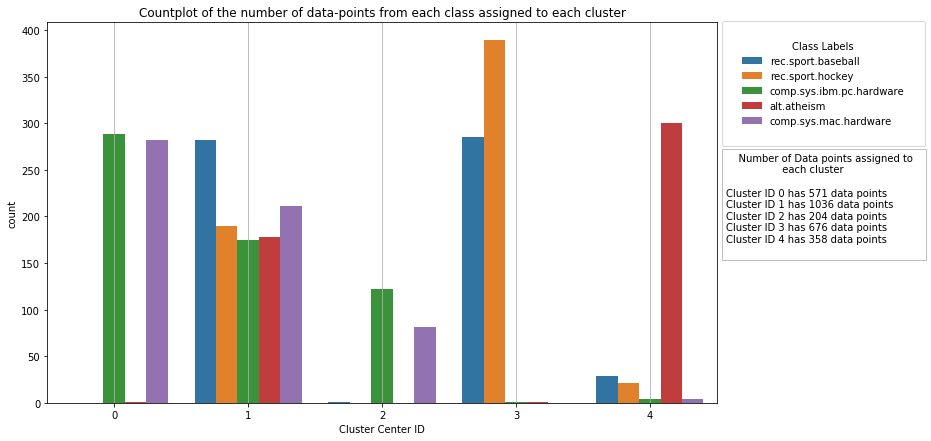

In [9]:
plt.figure(figsize=(12,7))
ax = sns.countplot(x=kmeans.labels_, hue=y)
ax.grid(axis='x')
plt.xlabel('Cluster Center ID')
plt.title('Countplot of the number of data-points from each class assigned to each cluster')
plt.legend(loc='center left', bbox_to_anchor=[1.0, 0.84],borderpad=2, title='Class Labels')
counts = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0
}
string = ''
for centroid in kmeans.labels_:
    counts[centroid] += 1
string += '    Number of Data points assigned to   \n                  each cluster\n\n'    
# print('Total number of data points assigned to each cluster')
for k,v in counts.items():
    string += 'Cluster ID '+str(k)+' has '+str(v)+' data points\n'
#     print('Centroid ID ',k,' has ',v,' data points')   
props = dict(facecolor='white', alpha=0.5, edgecolor='grey')
plt.text(4.57,160,string,bbox=props)
plt.show()

<div align="right"><font color="blue" size="4">6.0</font></div>

(b) 
For the clusters with ID 0 there is a high count of the classes ibm.pc.hardware and sys.mac.hardware and near zero counts for the other calsses.
In cluster ID 1 there is a very high count of baseball and the second highest count belongs to mac.hardware. However, the third highst count belongs to hockey. The classes atheism and pc.hardware have nearly equal counts.
In cluster ID 2 pc.hardware and mac.hardware co-occur in large counts.
In cluster ID 3 baseball and hockey co-occcur in large counts.
In cluster ID 4 atheism occurs in large count.

The output of the clusters while being different from the ideal case (where each class gets its own cluster id) does show accumulation of correlated data points. With the exception of Cluster ID 1, in most of the other clusters, either the pairs (baseball,hockey) or (pc.hardware, mac.hardware) co occur. The class atheism being isolated, mostly occurs in cluster ID 5. 

The ARI measure was positive but nowhere near 1. This measure is hence in agreement with the observations from the graphs as a positive ARI value suggests somewhat similar labelings, which is indeed the case.

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

### ========== Question 2.4 --- (LEVEL 11) --- [11 marks] ==========

Another way to quantify the quality of the fit is to use the Aggregate Intra-Cluster Distance (this is known as the `inertia` within SKLearn).

&nbsp;&nbsp;**(a)** [Text] Again by referring to the [sklearn documentation](http://scikit-learn.org/0.19/modules/clustering.html), describe what this measure reports. Indicate why it may be less straightforward at judging the quality of the clustering than the ARI. (2 to 3 sentences). <br>
&nbsp;&nbsp;**(b)** [Code] Report the Inertia of the fitted model as well as the mean distance between each data-point and the global mean. Compute also a distance matrix such that the entry with index (i,j) shows the distance between centre i and j.<br>
&nbsp;&nbsp;**(c)** [Text] Using the above values, comment on what the Inertia score tells us about the quality of the fit, as well as anything else you can say about the clusters. (2 to 3 sentences)

<div align="right"><font color="blue" size="4">6.5/11.0</font></div>

(a) The k-means algorithm forms clusters by minimizing the parameter called inertia. The inertia value reports the sum of squared distances of samples to their closest cluster center.

Inertia is not a normalized metric and may give rise to inflated values in very high dimensional spaces, due to the fact that they use sum of squared distances. The only deduction that inertia allows is, the closer inertia is to zero the better it is. Inertia also makes the assumption that the clusters are convex and isotropic. Using ARI we can make a somewhat better statement about the clustering because ARI value being, negative or positive has a clear meaning. Also many a times the classes may be related to each other and this structure is reflected in the clusters formed (cluster structure). However, just by mentioning the value of the inertia it is hard to conclude about the quality and structure of the clusters. 

<div align="right"><font color="blue" size="4">2.0</font></div>

In [10]:
print('The inertia of the fitted model is: ',kmeans.inertia_)
global_mean = X.mean(axis=0)
# measuring the euclidean distance beween data point and mean
mean_distances = []
np.linalg.norm
X_np = X.values # converts the data froame to a numpy matrix
for x in X_np:
    # uses the numpy linear algebra library and calculates the frobenius norm between the vectors
    mean_distance = np.linalg.norm(x-global_mean) 
    mean_distances.append(mean_distance)
mean_distances = np.asanyarray(mean_distances) # converts list to np array so mean can be computed  
print('Mean of the distance between each data point and the global mean: ',mean_distances.mean()) 
# The row indices index into the cluster centeres and the columns index into the data points
mean_distances_matrix = np.zeros((5,X.shape[0]))
for i,centroid in enumerate(kmeans.cluster_centers_):
    for j,datapoint in enumerate(X_np):
        # uses the numpy linear algebra library and calculates the frobenius norm between the vectors
        mean_distance = np.linalg.norm(datapoint-centroid)
        mean_distances_matrix[i][j] = mean_distance
print('Dimensions of the distance_matrix is : ' , mean_distances_matrix.shape)
print('Printing few values from the matrix:')
print(mean_distances_matrix)

The inertia of the fitted model is:  2593.1987614976024
Mean of the distance between each data point and the global mean:  0.9545849498516412
Dimensions of the distance_matrix is :  (5, 2845)
Printing few values from the matrix:
[[1.02253076 1.01643413 1.01955029 ... 0.99971132 1.01627244 1.00352939]
 [0.99370265 0.99344062 0.99660489 ... 0.99529818 0.98828624 0.98339881]
 [1.05794221 1.05733792 1.06019802 ... 0.95892263 1.05374248 1.0464111 ]
 [1.02300121 0.96447934 0.9564874  ... 1.01471118 0.98089152 0.97712643]
 [1.02896878 1.02164381 1.01939443 ... 1.02640736 1.01083338 0.99804819]]


<div align="right"><font color="blue" size="4">2.5</font></div>

<div align="left"><font color="green" size="4">Distance matrix seems wrong
Inertia and mean distance need to be up to 2s.f. and 4s.f.</font></div>

(c) The inertia value is far from zero. This suggests that most of the data points are located at some distances from their nearest centroids. A set of clusters formed whose interia value is lesser maybe indeed better. The inertia value hence, tell us that there is a scope of improvement in the clusters formed.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Unless interia is normalised it is not comparable.
Did not comment on close and distant clusters
Distance-metric provides a different picture from the plot in question 1.4 hence cluster distances is not enough of a measure of class similarity</font></div>

### ========== Question 2.5 --- [16 marks] ==========

We will now investigate using [PCA](http://scikit-learn.org/0.19/modules/generated/sklearn.decomposition.PCA.html) dimensionality reduction to try and improve the quality of the fit.

&nbsp;&nbsp;**(a)** [Text] Give one reason why PCA **might** be preferrable in certain cases in reducing dimensionality over just picking a subset of the features.<br>
&nbsp;&nbsp;**(b)** [Code] Pick 10 values in the range [1, ... 1000] inclusive, representing feature-space dimensionality `n`. Use a log-scale to span this range efficiently. For each of these values, reduce the dimensionality of `X` to the respective size (i.e. PCA with `n` components), and then fit a 5-centre KMeans classifier, storing the `adjusted_rand_score` for each dimensionality. *N.B: Set the `random_state=1000` for both PCA and K-Means objects to ensure reproducability.*<br>
&nbsp;&nbsp;**(c)** [Code] Plot the the `adjusted_rand_score` against the number of principal components. **Scale** the axes appropriately to visualise the results, and label the plot.<br>
&nbsp;&nbsp;**(d)** [Text] Comment on the effect dimensionality reduction had on the K-Means clustering and what could give rise to this (2 - 3 sentences).<br>
&nbsp;&nbsp;**(e)** [Code] Fit a 5-cluster K-Means object to the data with the dimensionality that produced the best ARI. In a similar manner to [Question 2.3](#question_2_3), plot a bar-chart of the number of data-points from each class assigned to each cluster. *N.B: Remember to set `random_state=1000` for both PCA and K-Means objects, and label all your diagrams*.<br>
&nbsp;&nbsp;**(f)** [Text] Compare the clustering distribution in **(e)** and in [Question 2.3 **(a)**](#question_2_3). *Hint: comment briefly (1 to 2 sentences) on the distribution of classes*.

<div align="right"><font color="blue" size="4">15.0/16.0</font></div>

(a) On simply dropping features from the dataset (feature elimination), we lose information from the dataset. Also, picking a subset of the features requires the feature extractor to have an in-depth knowledge on the background of the problem to which the machine learning algorithm is applied. PCA, on the other hand, is a mathematical procedure that aims to reduce the dimensionality of the problem by constructing a new set of properties from the input features, by utilizing the variance measures of the features. PCA gives rise to principal components which are linear combination of the features in the original data set.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [11]:
search_space = np.logspace(0,3,10,base=10,dtype=int)
print('The search space contans the following dimensions')
print(search_space)
ari = np.zeros(10)
for i,dim_redn_value in enumerate(search_space):
    pca = PCA(n_components = dim_redn_value, random_state = 1000)    
    X_for_pca = pca.fit_transform(X) # Fit the model with X and apply the dimensionality reduction on X.
    kmeans_pca = KMeans(n_clusters = 5, random_state=1000) 
    kmeans_pca.fit(X_for_pca)
    ARI = adjusted_rand_score(y,kmeans_pca.labels_)
    ari[i] = ARI
print('The ARI values are: ')
print(ari)
print('Best ARI value is: ',ari.max())
print('The best ARI value occurs for the search space with the dimensions: ',search_space[ari.argmax()])

The search space contans the following dimensions
[   1    2    4   10   21   46  100  215  464 1000]
The ARI values are: 
[0.2112937  0.26805762 0.23455408 0.21428094 0.20008566 0.22098141
 0.22357874 0.21615628 0.20758838 0.22708952]
Best ARI value is:  0.2680576185890075
The best ARI value occurs for the search space with the dimensions:  2


<div align="right"><font color="blue" size="4">3.0</font></div>

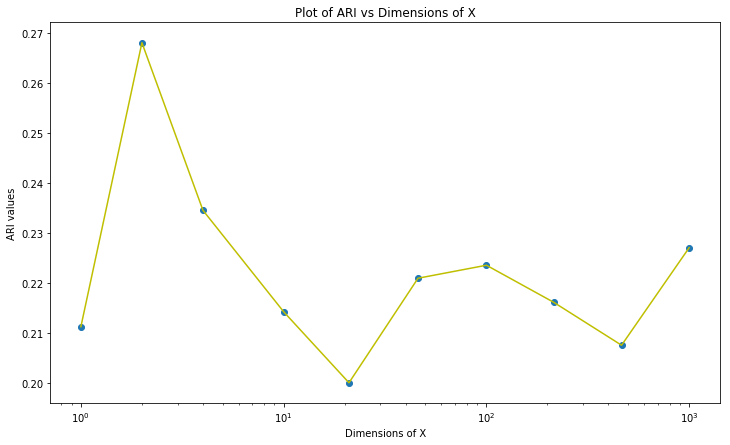

In [12]:
plt.figure(figsize=(12,7))
plt.title('Plot of ARI vs Dimensions of X')
plt.plot(search_space,ari,'y')
plt.scatter(search_space,ari)
plt.xlabel('Dimensions of X')
plt.ylabel('ARI values')
plt.xscale('log') 
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">x-axis is the number of principal components</font></div>

(d) From the above graph, the Adjusted Rand Index values first increases and reaches a maximum for the pca reduction to 2 components. Thereafter the ARI value is never as high as the PCA with 2 dimensions (the closer the ARI value to 1 the better).
Dimensionality reduction helps kmeans to classify better because pca removes the redundant features and converts the features to orthogonal (independent) features. The graph above suggests that using just 2 pca vectors leads to optimal classification by the kmeans classifier.

<div align="right"><font color="blue" size="4">3.0</font></div>

The best dimensionality for PCA is:  2


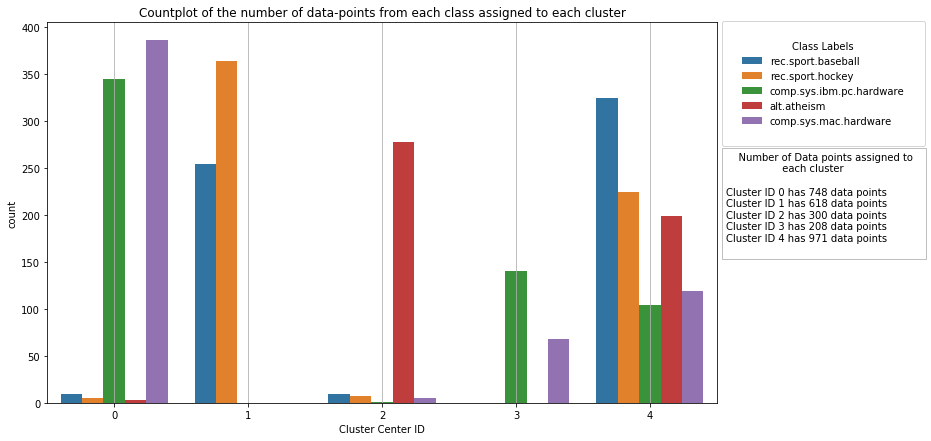

In [14]:
best_dimension = search_space[ari.argmax()]
print('The best dimensionality for PCA is: ',best_dimension )

pca_best = PCA(n_components = best_dimension, random_state = 1000)
X_for_pca = pca_best.fit_transform(X) # Fit the model with X and apply the dimensionality reduction on X.
kmeans_best = KMeans(n_clusters = 5, random_state=1000)
kmeans_best.fit(X_for_pca)
plt.figure(figsize=(12,7))
ax = sns.countplot(x=kmeans_best.labels_, hue=y)
ax.grid(axis='x')
plt.title('Countplot of the number of data-points from each class assigned to each cluster')
plt.xlabel('Cluster Center ID')
plt.legend(loc='center left', bbox_to_anchor=[1.0, 0.84],borderpad=2, title='Class Labels')
counts = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0
}
string = ''
for centroid in kmeans_best.labels_:
    counts[centroid] += 1
string += '    Number of Data points assigned to   \n                  each cluster\n\n'    
# print('Total number of data points assigned to each cluster')
for k,v in counts.items():
    string += 'Cluster ID '+str(k)+' has '+str(v)+' data points\n'
#     print('Centroid ID ',k,' has ',v,' data points')   
props = dict(facecolor='white', alpha=0.5, edgecolor='grey')
plt.text(4.57,160,string,bbox=props)
plt.show()

<div align="right"><font color="blue" size="4">4.0</font></div>

(f) On observing the count distribution above, we see that cluster ID 1 has class labels baseball and hockey, which co-occur in large counts. In Question 2.3 for cluster ID 1, however,there was a very high count of baseball and the second highest count belonged to mac.hardware. In custer ID 2 the large counts of pc.hardware and mac.hardware(in Q2.3) are replaced by atheism.
Overall it can be observed that the quality of the clusters formed has improved as the data points that belong to a particular class and related class points show better grouping to the clusters.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Good</font></div>

### ========== Question 2.6 --- [16 marks] ==========

Another benefit of Dimensionality Reduction is that it allows us to visualise the data. That is, while we cannot visualise a 1000-feature space, we can pick the top two components and visualise those. We will do this by means of a [Voronoi Diagram](https://en.wikipedia.org/wiki/Voronoi_diagram), which we will use to analyse the cluster centres.

&nbsp;&nbsp;**(a)** [Text] By explaining what a Voronoi Diagram is, indicate why it is useful in visualising the extent (in space) of K-Means clusters?<br>
&nbsp;&nbsp;**(b)** [Code] Using the function `plot_voronoi` which we provided in the `utils` package, visualise the clusters in the two-dimensional PCA space (top two components). Mark each cluster centre, and visualise **some** (*Hint: sub-sample*) of the data points to give you an idea of where the true classes lie. Make sure that the key elements of the plot are clearly visible/discernible (you may need to tweak some parameters) and label clearly all necessary elements of the plot (color-coding, data points). *Tip: you may need to change y to a numeric value if using matplotlib rather than seaborn*.<br>
&nbsp;&nbsp;**(c)** [Text] What can you conclude from the plot as to the `classification-performance` of the K-Means classifier?

<div align="right"><font color="blue" size="4">9.0/16.0</font></div>

(a) A Voronoi diagram consists of a partition of a plane to convex polygons, by utilizing a certain number of generating points, such that each polygon contains exactly one generating point.

In the Voroni diagram below, the centroids of the clusters serve as the generating points. This diagram is useful in visualizing the K means cluster because we can observe the distribution of the data points with respect to the cluster centroids and as well as the spread of the data points from the cluster centroids, within the cluster.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">A voronoi diagram shows the partioning of a plane into regions based on some distance metric
In this case Voronoi diagram shows decision boundaries</font></div>

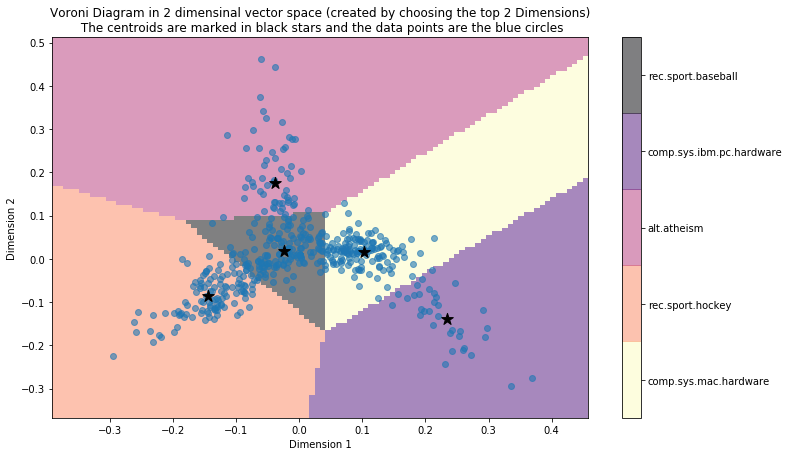

In [388]:
cluster_labels = ['comp.sys.mac.hardware',
        'rec.sport.hockey',
        'alt.atheism',        
        'comp.sys.ibm.pc.hardware',
        'rec.sport.baseball']
num_of_data_points_to_sample = 500
tolerance = 0.05
x_min = X_for_pca[:, 0].min() - tolerance
x_max = X_for_pca[:, 0].max() + tolerance
y_min = X_for_pca[:, 1].min() - tolerance
y_max = X_for_pca[:, 1].max() + tolerance
range_vals = [x_min, x_max,y_min, y_max]
fig = plt.figure(figsize=(12,7))
cmap = plt.get_cmap('magma_r', 5)
plotter.plot_voronoi(kmeans_best,range_vals,clr_map = cmap)#kmeans_best is a k means object built with top 2 pca components
yvals = kmeans_best.cluster_centers_[:,1]
xvals = kmeans_best.cluster_centers_[:,0]
data_xvals = X_for_pca[0:num_of_data_points_to_sample,0]
data_yvals = X_for_pca[0:num_of_data_points_to_sample,1]
cb = plt.colorbar(ticks=[0,1,2,3,4]) # using plt.colorbar to label the color codings
cb.ax.set_yticklabels(cluster_labels)  
plt.scatter(data_xvals,data_yvals, alpha = 0.6)
plt.scatter(xvals,yvals,s=150,color='black', marker='*')
plt.title('Voroni Diagram in 2 dimensinal vector space (created by choosing the top 2 Dimensions)\n The centroids are marked in black stars and the data points are the blue circles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

<div align="right"><font color="blue" size="4">7.0</font></div>

<div align="left"><font color="green" size="4">Did not do stratified sampling

Did not indicate cluster centersin legend
Did not add a legend indicating true label of each point
Did not label x/y axis correclty</font></div>

(c) From the plot, the classification performance of the kmeans classifier appears to be reasonable, as a majority of the data points are clustered around their respective cluster centroids. However, there is still scope of improvement in the clusters, as some of the clusters (the cluster labeled:comp.sys.ibm.pc.hardware and alt.atheism) have points that are far from their centroids and dispersed within their cluster planes.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Did not comment on the fact that classes are still not well separated
Did not comment on the fact that PCA preserves alot information in this case even with two components</font></div>